In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:, (2,3)] #꽃입의 길이와 너비
y=(iris.target==0).astype(int) #부채붓꽃 (Iris Setosa)인가?

per_clf=Perceptron()
per_clf.fit(X,y)

y_pred=per_clf.predict([[2,0.5]])

In [3]:
print(y_pred)

[0]


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
print(tf.__version__)

2.8.2


In [7]:
keras.__version__

'2.8.0'

In [8]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train=X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000] , y_train_full[5000:]
X_test=X_test/255.0

In [12]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #입력 이미지를 1D 배열로 반환
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1=model.layers[1]

In [18]:
hidden1.name

'dense'

In [19]:
model.get_layer('dense') is hidden1

True

In [20]:
weights, biases=hidden1.get_weights()

In [21]:
weights

array([[-0.04322717,  0.03902113, -0.06311086, ..., -0.06457203,
        -0.01163661, -0.04554011],
       [ 0.04185635,  0.07000716,  0.039364  , ..., -0.04324093,
        -0.02047697, -0.00172658],
       [ 0.03642536,  0.01967604,  0.00910227, ..., -0.06284358,
         0.03682935,  0.06892696],
       ...,
       [-0.04368523,  0.06808217,  0.06891116, ...,  0.07250923,
         0.00166781, -0.06683511],
       [-0.01699111, -0.04255198,  0.05535027, ..., -0.05955215,
        -0.03960469, -0.02465028],
       [-0.07068923,  0.03789703, -0.01797105, ..., -0.02517246,
        -0.03666063, -0.04759493]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy']) #sgd의 기본값 lr=0.01

In [29]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7241 - accuracy: 0.7608 - val_loss: 0.5140 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4880 - accuracy: 0.8292 - val_loss: 0.4438 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4408 - accuracy: 0.8451 - val_loss: 0.4208 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4133 - accuracy: 0.8535 - val_loss: 0.3960 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3936 - accuracy: 0.8608 - val_loss: 0.3871 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8669 - val_loss: 0.3738 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3634 - accuracy: 0.8720 - val_loss: 0.3715 - val_accuracy:

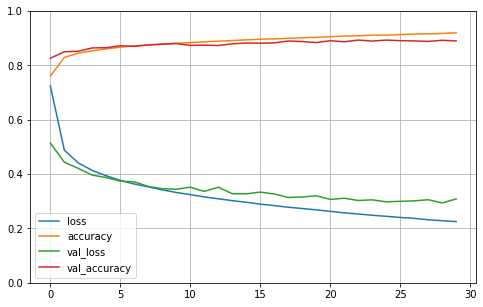

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #수직축의 범위를 [0-1] 사이로 설정
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3330 - accuracy: 0.8849


[0.3329581916332245, 0.8848999738693237]

In [35]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
y_prob=model.predict(X_new)
predicted = y_prob.argmax(axis=-1)
predicted

array([9, 2, 1])

In [40]:
np.array(class_names)[predicted]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [42]:
#주택가격 사용
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
housing=fetch_california_housing()

In [45]:
X_train_full, X_test, y_train_full, y_test=train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full)

In [46]:
scaler=StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [48]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [49]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [50]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8127 - val_loss: 1.5442
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4693 - val_loss: 0.5879
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4152 - val_loss: 0.4290
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3972 - val_loss: 0.3897
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3869 - val_loss: 0.4199
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3791 - val_loss: 0.4504
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3741 - val_loss: 0.4788
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3703 - val_loss: 0.4859
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3656 - val_loss: 0.4098
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.3932

In [51]:
mse_test=model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3645


In [52]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

In [54]:
#순차적이지 않은 신경망의 예
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation='relu')(input_)
hidden2=keras.layers.Dense(30, activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_, hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_], outputs=[output])

In [55]:
#어떤 입력은 짧은 경로, 어떤 입력은 복잡한 경로를 통해 간 후 얻어지는 output을 알고 싶을때
input_A=keras.layers.Input(shape=[5], name='wide_input')
input_B=keras.layers.Input(shape=[6], name='deep_input')
hidden1=keras.layers.Dense(30, activation='relu')(input_B)
hidden2=keras.layers.Dense(30, activation='relu')(hidden1)
concat=keras.layers.concatenate([input_A, hidden2])
output=keras.layers.Dense(1, name='output')(concat)
model=keras.Model(inputs=[input_A, input_B], outputs=[output])

In [57]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [62]:
X_train_A, X_train_B=X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B=X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B=X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B=X_test_A[:3], X_test_B[:3]

In [60]:
history=model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.5074 - val_loss: 1.9161
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8412 - val_loss: 0.9981
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6644 - val_loss: 0.7219
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5928 - val_loss: 0.6035
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5497 - val_loss: 0.5587
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5201 - val_loss: 0.5400
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4984 - val_loss: 0.5293
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4819 - val_loss: 0.5314
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4694 - val_loss: 0.5433
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4597 - val_loss: 0.5732

In [63]:
mse_test=model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5174


In [64]:
y_pred=model.predict((X_new_A, X_new_B))

In [65]:
y_pred

array([[1.4708468],
       [3.7078018],
       [2.3278737]], dtype=float32)

In [67]:
#보조 출력 추가
input_A=keras.layers.Input(shape=[5], name='wide_input')
input_B=keras.layers.Input(shape=[6], name='deep_input')
hidden1=keras.layers.Dense(30, activation='relu')(input_B)
hidden2=keras.layers.Dense(30, activation='relu')(hidden1)
concat=keras.layers.concatenate([input_A, hidden2])
output=keras.layers.Dense(1, name='main_output')(concat)
aux_output=keras.layers.Dense(1, name='aux_output')(hidden2)
model=keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [68]:
#각 출력은 자신만의 손실함수 필요 ==> 나열된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [69]:
history=model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.8844 - main_output_loss: 0.7876 - aux_output_loss: 1.7557 - val_loss: 0.5994 - val_main_output_loss: 0.5185 - val_aux_output_loss: 1.3270
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4955 - main_output_loss: 0.4423 - aux_output_loss: 0.9737 - val_loss: 0.6983 - val_main_output_loss: 0.6711 - val_aux_output_loss: 0.9431
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4460 - main_output_loss: 0.4049 - aux_output_loss: 0.8155 - val_loss: 0.8632 - val_main_output_loss: 0.8715 - val_aux_output_loss: 0.7888
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4274 - main_output_loss: 0.3957 - aux_output_loss: 0.7135 - val_loss: 0.5547 - val_main_output_loss: 0.5382 - val_aux_output_loss: 0.7036
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4173 - main_output_loss: 0.3905 - aux_output_loss: 0.6585 - val_loss

In [70]:
total_loss, main_loss, aux_loss=model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4472 - main_output_loss: 0.4235 - aux_output_loss: 0.6605


In [71]:
y_pred_main, y_pred_aux=model.predict([X_new_A, X_new_B])

In [73]:
print(y_pred_main)
print(y_pred_aux)

[[2.0513682]
 [3.644383 ]
 [2.6223447]]
[[2.1117468]
 [2.7940474]
 [2.395787 ]]


In [74]:
#서브클래싱 API
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) #표준 매개변수를 처리
        self.hidden1=keras.layers.Dense(units, activation=activation)
        self.hidden2=keras.layers.Dense(units, activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)

    def call(self ,inputs):
        input_A, input_B=inputs
        hidden1=self.hidden1(input_B)
        hidden2=self.hidden2(hidden1)
        concat=keras.layers.concatenate([input_A, hidden2])
        main_output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return  main_output, aux_output

model=keras.models.Sequential([]) ==> 모델 만든후

model.compile ==> 컴파일

model.fit ==> 훈련

model.save('my_keras_model.h5') ==> 모델 저장

model=keras.models.load_model('my_keras_model.h5') ==> 모델 불러오기

일정한 간격으로 모델의 체크포인트를 저장 ==> callbacks

In [ ]:
#콜백 사용하기
#.... 모델 만들고 컴파일
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history=model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras.model.h5', save_best_only=True) #==> 최상의 검증 세트 점수에만 모델 저장
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model.keras.models.load_model('my_keras_model.h5') #==> 최상의 모델로 복원

In [ ]:
#조기 종료 구현 ==> 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callback=[checkpoint_cb, early_stopping_cb])

# 10.3 신경망 하이퍼파라미터 튜닝하기

In [76]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [77]:
keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [78]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.1221 - val_loss: 0.8362
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.7217
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4904 - val_loss: 0.5804
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4431 - val_loss: 0.5388
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4190 - val_loss: 0.4895
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4045 - val_loss: 0.4119
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3958 - val_loss: 0.7325
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3889 - val_loss: 0.5830
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3836 - val_loss: 0.4224
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3805 - val_lo

In [79]:
mse_test=keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3687


In [80]:
y_pred=keras_reg.predict(X_new)

In [81]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs={
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4, 3e-2),
}

In [82]:
rnd_search_cv=RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [83]:
rnd_search_cv.fit(X_train ,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 2s 6ms/step - loss: 5.0552 - val_loss: 56.6847
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 3.0462 - val_loss: 21.9355
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 1.9796 - val_loss: 7.6099
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 1.3985 - val_loss: 2.5542
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0763 - val_loss: 1.0320
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8931 - val_loss: 1.0605
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7881 - val_loss: 1.4880
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7262 - val_loss: 2.0834
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6883 - val_loss: 2.5900
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6643 - val_

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7faad0485310>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faacf3f4690>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [84]:
rnd_search_cv.best_params_

{'learning_rate': 0.015137440144440517, 'n_hidden': 2, 'n_neurons': 88}

In [85]:
rnd_search_cv.best_score_

-0.3029055694739024

In [86]:
model=rnd_search_cv.best_estimator_.model